In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

TUXML_CSV_FILENAME="./config_bdd.csv"

# sanity check CSV
with open(TUXML_CSV_FILENAME, "r") as file:
    k = file.readline()
    t = k.split(",")
    s = set(t)
    assert(len(t) == len(s)) # unique number of options/features/column names

# parsing for real with pandas 
rawtuxdata = pd.read_csv(open(TUXML_CSV_FILENAME, "r"))

basic_head = ["cid", "time"] # "compile"
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

tri_state_values = ['y', 'n', 'm']

ftuniques = []
freq_ymn_features = []
non_tristate_options = []

for col in rawtuxdata:
    ft = rawtuxdata[col]    
    # eg always "y"
    if len(ft.unique()) == 1:
        ftuniques.append(col)
    # only tri-state values (y, n, m) (possible TODO: handle numerical/string options)    
    elif all(x in tri_state_values for x in ft.unique()):     #len(ft.unique()) == 3: 
        freq = ft.value_counts(normalize=True)
        freqy = 0
        freqn = 0
        freqm = 0
        if ('y' in freq.index):
            freqy = freq['y']
        if ('n' in freq.index):
            freqn = freq['n']
        if ('m' in freq.index):
            freqm = freq['m']
        freq_ymn_features.append((col, freqy, freqm, freqn))
        # categorical variable
        #if tuxdata[col].dtype == 'object':
        #    try:
        #        tuxdata[col] = tuxdata[col].astype('category')
        #    except:
        #        print('Column', ' ', col, ' cannot be converted to category.')
    else:
        if not (col in size_methods): 
            non_tristate_options.append(col)
        

### TODO: we want to keep all quantitative values!
# non_tristate_options.remove('LZO') # ('vmlinux')

# we want to keep measurements (that are not tristate ;)) 
# non_tristate_options = list(set(non_tristate_options) - set(size_methods))

#### print options with unique values
# options with only one value eg always "y"
#i = 0
#for ft in ftuniques:
#    print(ft + " (" + str(i) + ")")
#    i = i + 1

print("Original size (#configs/#options) of the dataset " + str(rawtuxdata.shape))
print ("Number of options with only one value (eg always y): " + str(pd.DataFrame(ftuniques).shape))

# maybe we can drop options with only one unique value (no interest for machine learning)
rawtuxdata.drop(columns=ftuniques,inplace=True)

print ("Non tri-state value options (eg string or integer or hybrid values): " 
       + str(pd.DataFrame(non_tristate_options).shape) + " ") 
#      + str(pd.DataFrame(non_tristate_options)))

print ("Predictor variables: " + str(rawtuxdata.drop(columns=non_tristate_options).columns.size))
# frequency of y, m, and n values 
#plt.figure()
#pd.DataFrame(freq_ymn_features, columns=["feature", "freqy", "freqm", "freqn"]).plot(kind='hist', alpha=0.8) #plot()
#plt.show()


    



/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1150,6015,6026,6717,7350,7676,7726,8507,9949,10442) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Original size (#configs/#options) of the dataset (37221, 12798)
Number of options with only one value (eg always y): (3129, 1)
Non tri-state value options (eg string or integer or hybrid values): (173, 1) 
Predictor variables: 9496


In [2]:
rawtuxdata[rawtuxdata['vmlinux'] == 1168072][['cid', 'CC_OPTIMIZE_FOR_SIZE']]

,cid,CC_OPTIMIZE_FOR_SIZE
15762,56589,y
15763,56590,y
15764,56591,y
29777,70713,y
29781,70717,y
29790,70730,y
29791,70731,y


In [3]:
rawtuxdata[rawtuxdata['vmlinux'] == -1]

,cid,date,time,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,...,SND_SOC_INTEL_SKL_NAU88L25_SSM4567_MACH,APDS9960,ARCH_SUPPORTS_INT128,SLABINFO,MICROCODE_AMD,ISDN_DRV_HISAX,CHARGER_BQ24190,SND_SOC_NAU8825,BH1750,NETWORK_FILESYSTEMS
6,40516,2018-06-14 01:34:03,526.998,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,n,m,n,n,n
15,40525,2018-06-14 01:34:53,1026.140,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,n,n,n,n,y
28,40538,2018-06-14 01:36:42,329.267,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,y,n,y,y,n,n,n
53,40563,2018-06-14 01:38:58,476.485,-1,-1,-1,-1,-1,-1,-1,...,n,m,y,n,y,n,n,n,m,y
66,40576,2018-06-14 01:40:23,1020.910,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,y,n,n,m,n,m,y
79,40589,2018-06-14 01:42:05,831.822,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,y,n,m,y,n,n,y
147,40657,2018-06-14 01:49:23,378.186,-1,-1,-1,-1,-1,-1,-1,...,n,y,y,n,n,n,n,n,y,y
157,40667,2018-06-14 01:50:24,411.542,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,n,y,n,y,n
182,40692,2018-06-14 01:53:25,414.313,-1,-1,-1,-1,-1,-1,-1,...,n,n,y,n,n,n,y,n,n,n
186,40696,2018-06-14 01:53:44,294.262,-1,-1,-1,-1,-1,-1,-1,...,y,y,y,n,y,n,y,y,y,y


In [4]:
# playing a bit with the data 
rawtuxdata.dtypes
# 'DEBUG_INFOO' in list(pd.DataFrame(non_tristate_options)[0]) # 
# tuxdata['DEBUG_INFO'].unique()
#tuxdata['OUTPUT_FORMAT'].dtypes
#tuxdata['DEFAULT_HOSTNAME'].unique()

#rawtuxdata[:5]
rawtuxdata[:20]['vmlinux']
#tuxdata[:5]['CONFIG_DEBUG_INFO']
#tuxdata['ARCH_HAS_SG_CHAIN'].unique()
#tuxdata['ARCH_HAS_SG_CHAIN'].astype('category')

0       26971392
1       58998872
2       27184120
3     1131987240
4      163530480
5       53545304
6             -1
7       43004568
8       23734776
9       23937056
10      27101784
11     114599080
12      28977072
13      28499264
14     353656488
15            -1
16      59662792
17      48122968
18     250168832
19      29132408
Name: vmlinux, dtype: int64

In [5]:
rawtuxdata.shape, rawtuxdata[rawtuxdata['vmlinux'] != -1].shape, 

((37221, 9669), (34859, 9669))

In [6]:
from sklearn.preprocessing import *
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


LEARN_COMPILATION_SUCCESS = False # costly in time and space 
compilation_status_column_name = 'compile_success'

def encode_data_compilation(rawtuxdata):
    lae = LabelEncoder()
    # we save quantitative values we want (here vmlinux, TODO: generalize)
    # the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
    # vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
    o_sizes = rawtuxdata[size_methods]

    # we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
    #tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
    tuxdata_for_compilation = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(lae.fit_transform)

    #tuxdata['vmlinux'] = vml 
    tuxdata_for_compilation[size_methods] = o_sizes
    tuxdata_for_compilation[compilation_status_column_name] = rawtuxdata['vmlinux'] != -1
    return tuxdata_for_compilation

def learn_compilation_success(tuxdata_for_compilation):
    TESTING_SIZE=0.9 
    X_train, X_test, y_train, y_test = train_test_split(tuxdata_for_compilation.drop(columns=size_methods).drop(columns=compilation_status_column_name), tuxdata_for_compilation[compilation_status_column_name], test_size=TESTING_SIZE, random_state=0)  
    clf = GradientBoostingClassifier(n_estimators=100) #RandomForestRegressor(n_estimators=100) #   #GradientBoostingRegressor(n_estimators=100)  
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=20
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata_for_compilation.columns[indices[f]], indices[f], importances[indices[f]]))

    acc = accuracy_score (y_test, y_pred)
    prec = precision_score (y_test, y_pred)
    reca = recall_score (y_test, y_pred)
    f1 = f1_score (y_test, y_pred)
    print("Accuracy score: %.2f" % (acc))
    print("Precision score: %.2f" % (prec))
    print("Recall score: %.2f" % (reca))
    print("F1 score: %.2f" % (f1))

if (LEARN_COMPILATION_SUCCESS):
    tuxdata_for_compilation = encode_data_compilation(rawtuxdata)
    tuxdata_for_compilation [compilation_status_column_name].describe()
    learn_compilation_success(tuxdata_for_compilation)

count     37221
unique        2
top        True
freq      34859
Name: compile_success, dtype: object

Feature ranking: top (20)
1. feature DRM_VBOXVIDEO 6047 (0.251345)
2. feature AIC79XX_BUILD_FIRMWARE 1981 (0.157050)
3. feature AIC7XXX_BUILD_FIRMWARE 1401 (0.119640)
4. feature CLK_TWL6040 8198 (0.070485)
5. feature WANXL_BUILD_FIRMWARE 7962 (0.063726)
6. feature NETCONSOLE_DYNAMIC 4667 (0.063683)
7. feature SND_DESIGNWARE_PCM 5900 (0.053814)
8. feature GENERIC_ALLOCATOR 8976 (0.039832)
9. feature NET_SB1000 5088 (0.023871)
10. feature NF_LOG_BRIDGE 3153 (0.021550)
11. feature SPI_MESON_SPICC 1298 (0.010601)
12. feature ATM_ENI_TUNE_BURST 5768 (0.009727)
13. feature ATM_IA 6555 (0.009614)
14. feature FB_GEODE_GX1 6080 (0.007954)
15. feature ATM_AMBASSADOR_DEBUG 6526 (0.007624)
16. feature DMA_SHARED_BUFFER 1980 (0.007344)
17. feature SPI_CLPS711X 277 (0.007262)
18. feature ISDN_DRV_LOOP 9457 (0.007206)
19. feature NET_IPGRE 1389 (0.007164)
20. feature NLS 4358 (0.007030)
Accuracy score: 1.00
Precision score: 1.00
Recall score: 1.00
F1 score: 1.00


In [8]:
# remove entries with same configurations
print(str(len(rawtuxdata)) + " before the removal of some entries (those with same configurations)")
# tuxdata.drop_duplicates(subset=tuxdata.columns.difference(['vmlinux']), inplace=True)
#TODO: seems not working 
rawtuxdata.drop_duplicates(subset=rawtuxdata.columns.difference(size_methods), inplace=True)
print(str(len(rawtuxdata)) + " after the removal of some entries (those with same configurations)")

#n_failures = len(tuxdata[~np.isnan(tuxdata['vmlinux'])])
n_failures = len(rawtuxdata[rawtuxdata['vmlinux'] == -1]) #len(tuxdata[np.isnan(tuxdata['vmlinux'])])
print(str(n_failures) + " failures out of " + str(len(rawtuxdata)))

#tuxdata = tuxdata[~np.isnan(tuxdata['vmlinux'])]
rawtuxdata = rawtuxdata[rawtuxdata['vmlinux'] != -1] #tuxdata[~np.isnan(tuxdata['vmlinux'])]
print(str(len(rawtuxdata)) + " after the removal of configurations that do NOT compile")



#tuxdata["vmlinux"]
#tuxdata.where(tuxdata["vmlinux"] == np.NaN)

#tuxdata[tuxdata["vmlinux"] != -1]
#tuxdata
#tuxdata[tuxdata['vmlinux'] != -1].shape

37221 before the removal of some entries (those with same configurations)
37221 after the removal of some entries (those with same configurations)
2362 failures out of 37221
34859 after the removal of configurations that do NOT compile


In [9]:
print("some configurations have X86_32 (coz we have tested/tried some options and there are in the database)", rawtuxdata['X86_64'].describe())
# we only keep X86_64 configurations
rawtuxdata = rawtuxdata[rawtuxdata['X86_64'] == 'y']

some configurations have X86_32 (coz we have tested/tried some options and there are in the database) count     34859
unique        2
top           y
freq      34851
Name: X86_64, dtype: object


<Figure size 432x288 with 0 Axes>

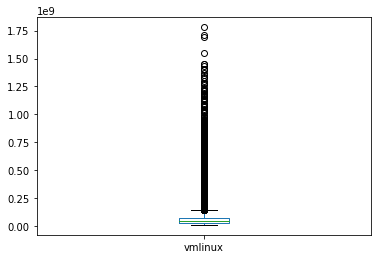

<Figure size 432x288 with 0 Axes>

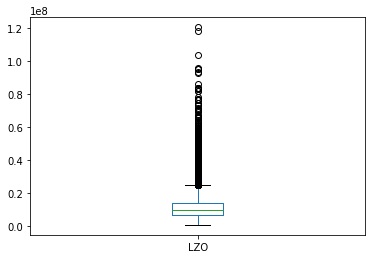

<Figure size 432x288 with 0 Axes>

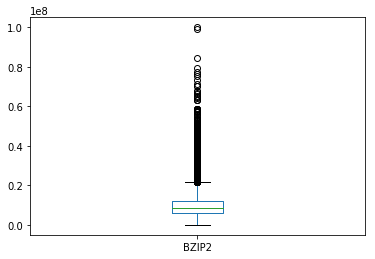

count    3.485100e+04
mean     7.154831e+07
std      9.648957e+07
min      7.317008e+06
25%      2.885996e+07
50%      4.350080e+07
75%      7.359748e+07
max      1.780630e+09
Name: vmlinux, dtype: float64

In [10]:
plt.figure()
pd.DataFrame(rawtuxdata['vmlinux']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(rawtuxdata['BZIP2']).plot.box()
plt.show(block=False)


rawtuxdata['vmlinux'].describe()


In [11]:
import scipy.stats
import seaborn as sns



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(rawtuxdata[compress_method + size_measure_of_interest] / rawtuxdata[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

#(rawtuxdata["XZ-vmlinux"] - rawtuxdata["BZIP2-vmlinux"]).plot.box()
# n_size_methods = len(size_methods)
#corr_sizes = [[0 for x in range(n_size_methods)] for y in range(n_size_methods)]
#i = 0
#j = 0
#for size_method in size_methods:
#    csize = rawtuxdata[size_method]   
#    for osize_method in size_methods:
#        if size_method != osize_method:
#            osize = rawtuxdata[osize_method]           
#            pcorr = scipy.stats.pearsonr(csize, osize)[0]
#            corr_sizes[i][j] = pcorr
#        j = j + 1
#    i = i + 1

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,2.89463,25.1771,39.4219,-10.3498,-16.5068
BZIP2o,-2.72664,0,21.766,35.5788,-12.8396,-18.8462
LZMAo,-20.0392,-17.7259,0,11.3894,-28.2794,-33.1883
XZo,-24049.3,-24047.2,-24031.2,0,-35.3792,-39.8026
LZOo,-45874.5,-45871.4,-45846.4,55.697,0,-6.89773
LZ4o,-50086.7,-50083.3,-50056.4,67.3691,7.42836,0


In [12]:
compareCompress("-bzImage").style.set_caption('Difference (average in percentage) per compression methods, bzImage').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-31.055,24.7563,38.3758,-10.0214,-16.2129
BZIP2o,49.3948,0,85.7707,105.658,34.5259,25.3211
LZMAo,-19.768,-44.8602,0,10.9227,-27.7708,-32.7249
XZo,-27.4044,-50.1854,-9.51612,0,-34.6545,-39.137
LZOo,11.22,-23.2593,38.8355,53.9687,0,-6.91041
LZ4o,19.538,-17.4819,49.2629,65.529,7.44206,0


In [13]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-26.1695,19.128,28.8793,-8.21516,-13.448
BZIP2o,37.3356,0,62.972,76.0108,26.2195,19.1205
LZMAo,-15.9286,-38.1677,0,8.15374,-22.7789,-27.1527
XZo,-22.0699,-42.7781,-7.33427,0,-28.4146,-32.4636
LZOo,9.02699,-19.3982,29.9874,40.6349,0,-5.73281
LZ4o,15.7225,-14.3767,38.0339,49.351,6.1023,0


In [14]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(rawtuxdata[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)


,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.485385,0.485409,0.483914,0.500431,0.500379,0.499155,0.474485,0.474519,0.472493,0.479328,0.479364,0.478089,0.500858,0.501108,0.500435,0.506739,0.507006,0.506426
GZIP-bzImage,0.485385,1,1,0.999881,0.996952,0.996573,0.99703,0.99772,0.997721,0.997544,0.993909,0.99391,0.993847,0.996966,0.996993,0.997128,0.993777,0.993806,0.993983
GZIP-vmlinux,0.485409,1,1,0.99988,0.996957,0.996579,0.997034,0.997719,0.99772,0.997542,0.993908,0.99391,0.993846,0.996971,0.996997,0.997133,0.993783,0.993813,0.993989
GZIP,0.483914,0.999881,0.99988,1,0.99669,0.99631,0.996961,0.99757,0.997571,0.997714,0.993885,0.993885,0.993852,0.996807,0.996751,0.996905,0.993554,0.993495,0.993688
BZIP2-bzImage,0.500431,0.996952,0.996957,0.99669,1,0.999627,0.999921,0.9937,0.993709,0.993331,0.991138,0.991147,0.990804,0.998322,0.998336,0.998306,0.997261,0.997276,0.997303
BZIP2-vmlinux,0.500379,0.996573,0.996579,0.99631,0.999627,1,0.999547,0.993323,0.993332,0.992952,0.990759,0.990768,0.990423,0.997955,0.997969,0.997937,0.996899,0.996913,0.996939
BZIP2,0.499155,0.99703,0.997034,0.996961,0.999921,0.999547,1,0.993761,0.993769,0.993652,0.991296,0.991303,0.990992,0.99833,0.998279,0.998267,0.997203,0.997147,0.997191
LZMA-bzImage,0.474485,0.99772,0.997719,0.99757,0.9937,0.993323,0.993761,1,1,0.999785,0.994152,0.994151,0.994143,0.99095,0.991001,0.991167,0.986118,0.986174,0.986378
LZMA-vmlinux,0.474519,0.997721,0.99772,0.997571,0.993709,0.993332,0.993769,1,1,0.999783,0.994152,0.994152,0.994142,0.990958,0.991009,0.991174,0.986129,0.986185,0.986388
LZMA,0.472493,0.997544,0.997542,0.997714,0.993331,0.992952,0.993652,0.999785,0.999783,1,0.994105,0.994103,0.994136,0.990718,0.990658,0.990848,0.9858,0.985736,0.985962


In [15]:
#from category_encoders import *
from sklearn.preprocessing import *

#X = [['y', 1], ['n', 3], ['m', 2]]
#enc.fit(X)
#enc.transform(tuxdata)

#enc = OrdinalEncoder().fit(tuxdata[:10])

# transform the dataset
#enc.transform(tuxdata[:10])

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
#print(non_tristate_options)

# we save quantitative values we want (here vmlinux, TODO: generalize)
# the key idea is that the labelling encoder should not be applied to this kind of values (only to predictor variables!)
# vml = rawtuxdata['LZO'] # rawtuxdata['vmlinux'] 
vml = rawtuxdata[size_methods]

# we remove non tri state options, but TODO there are perhaps some interesting options (numerical or string) here
#tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=['vmlinux']).apply(le.fit_transform)
tuxdata = rawtuxdata.drop(columns=non_tristate_options).drop(columns=size_methods).apply(le.fit_transform)

#tuxdata['vmlinux'] = vml 
tuxdata[size_methods] = vml
# tuxdata['vmlinux'].astype('int64')

# example: DEBUG_INFO is either y or n
tuxdata['DEBUG_INFO'].unique()

array([0, 1])

In [16]:
#print ("Warning, we only focus on configurations without DEBUG_INFO ")
#tuxdata = tuxdata[tuxdata['DEBUG_INFO'] == le.transform(['n'])[0]]

In [17]:
tuxdata.shape

(34851, 9496)

In [18]:
# tuxdata.where(not np.isnan(tuxdata["vmlinux"]))
#tuxdata["vmlinux"][16] == np.isnan
#vml == -1 
#tuxdata["vmlinux"] == -1
#tuxdata['vmlinux'].dtypes
#vml.dtypes
#tuxdata['vmlinux'].dtypes #.astype('int64')
#TODO: remove configurations like this 

In [19]:
# tuxdata.where(tuxdata["vmlinux"] != -1).sort_values(by='vmlinux')[:5] # & 
print(tuxdata['UBSAN_SANITIZE_ALL'].value_counts(), tuxdata['COMPILE_TEST'].value_counts(), tuxdata['NOHIGHMEM'].value_counts(), tuxdata['OPTIMIZE_INLINING'].value_counts(), tuxdata['SLOB'].value_counts(), tuxdata['CC_OPTIMIZE_FOR_SIZE'].value_counts(), sep='\n')


0    30796
1     4055
Name: UBSAN_SANITIZE_ALL, dtype: int64
1    17607
0    17244
Name: COMPILE_TEST, dtype: int64
0    34851
Name: NOHIGHMEM, dtype: int64
1    17631
0    17220
Name: OPTIMIZE_INLINING, dtype: int64
0    34544
1      307
Name: SLOB, dtype: int64
0    34441
1      410
Name: CC_OPTIMIZE_FOR_SIZE, dtype: int64


In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import svm


TESTING_SIZE=0.9 

# drop(columns=["date", "time", "vmlinux", "cid"])
# tuxdata.drop(columns=non_tristate_options)

linearRegression=False
size_of_interest = "vmlinux" # could be LZO, BZIP, etc. 

X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_of_interest], test_size=TESTING_SIZE, random_state=0)  
# multi output
#X_train, X_test, y_train, y_test = train_test_split(tuxdata.drop(columns=size_methods), tuxdata[size_methods], test_size=TESTING_SIZE, random_state=0)  

# train_test_split(tuxdata.drop(columns=['vmlinux']), tuxdata['vmlinux'], test_size=TESTING_SIZE, random_state=0)  

#clf = RandomForestRegressor(n_estimators=100) 

if linearRegression:
    regr =  linear_model.Lasso() # svm.SVC(kernel='linear') # linear_model.Ridge(alpha=.1) #  # linear_model.Lasso() # linear_model.SGDRegressor() #LinearRegression() # SGDRegressor or linear_model.Lasso()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
else:
    clf = GradientBoostingRegressor(n_estimators=100) # RandomForestRegressor(n_estimators=100) #   
    # 
    #clf = Pipeline([
    #  ('feature_selection', SelectFromModel(LassoCV(tol = 0.001))),
    #  ('regression', GradientBoostingRegressor(n_estimators=100))
    # ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]    

    TOP_FT_IMPORTANCE=100
    print("Feature ranking: " + "top (" + str(TOP_FT_IMPORTANCE) + ")")
    for f in range(TOP_FT_IMPORTANCE): # len(indices)
        print("%d. feature %s %d (%f)" % (f + 1, tuxdata.columns[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
#plt.figure()
#plt.title("Feature importances for size of vmlinux")
#plt.bar(range(tuxdata.shape[1]), importances[indices], color="r", align="center")
#plt.xticks(range(tuxdata.shape[1]), indices)
#plt.xlim([-1, tuxdata.shape[1]])
#plt.show()
mae = mean_absolute_error (y_test, y_pred)# , multioutput='raw_values')
mse = mean_squared_error (y_test, y_pred) #, multioutput='raw_values') 
r2 = r2_score (y_test, y_pred) #, multioutput='raw_values') 

ONE_MEGABYTE = 1048576

print("Prediction score (MAE): %.2f" % (mae / ONE_MEGABYTE))
print("Prediction score (MSE): %.2f" % (mse / ONE_MEGABYTE))
print("Prediction score (R2): %.2f" % (r2))


Feature ranking: top (100)
1. feature DEBUG_INFO 4306 (0.167032)
2. feature DEBUG_INFO_SPLIT 5463 (0.075661)
3. feature DEBUG_INFO_REDUCED 5446 (0.050839)
4. feature UBSAN_SANITIZE_ALL 2111 (0.050819)
5. feature RANDOMIZE_BASE 4443 (0.041214)
6. feature X86_NEED_RELOCS 4448 (0.024974)
7. feature GCOV_PROFILE_ALL 9440 (0.019454)
8. feature UBSAN_ALIGNMENT 2117 (0.017012)
9. feature GDB_SCRIPTS 5499 (0.014216)
10. feature DRM_RADEON 2898 (0.013452)
11. feature KASAN_OUTLINE 5981 (0.013131)
12. feature DEBUG_INFO_DWARF4 5479 (0.012061)
13. feature GPIO_WHISKEY_COVE 5890 (0.010442)
14. feature KASAN 503 (0.009267)
15. feature CHROME_PLATFORMS 5626 (0.008675)
16. feature IPV6_SIT_6RD 4018 (0.008193)
17. feature STRICT_MODULE_RWX 9410 (0.007633)
18. feature XFS_FS 4202 (0.007231)
19. feature DVB_NET 4272 (0.007146)
20. feature HW_RANDOM_VIRTIO 1920 (0.006181)
21. feature SENSORS_INA3221 5243 (0.006178)
22. feature DRM_VBOXVIDEO 6047 (0.005968)
23. feature WILC1000_SPI 4845 (0.005893)
24. fea

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True)
tuxdata_reduced = model.transform(tuxdata.drop(columns=size_methods))
tuxdata_reduced.shape, tuxdata.shape


((34851, 297), (34851, 9496))

In [22]:
#lass = SelectFromModel(LassoCV(tol = 0.001))
#lass.fit(X_train, y_train)
#tuxdata_reduced_lass = lass.transform(tuxdata.drop(columns=size_methods))
#tuxdata_reduced_lass.shape, tuxdata.shape 

In [23]:
ft_vals = ['y', 'n'] 
tri_state_values = ['y', 'n', 'm']
all(x in tri_state_values for x in ft_vals)

True

In [24]:
#for tux1 in tuxdata:
#    ft1 = tuxdata[tux1]
#    for tux2 in tuxdata:
#        if (tux1 != tux2):
#            if (ft1.all() == tuxdata[tux2].all()):
#                print ("feature " + str(tux1) + " always have the same values than " + str(tux2))
            
    

In [25]:
#provisoire = pd.read_csv(open('provisoire.csv', "r"))

In [26]:
#provisoire[['cid','CC_OPTIMIZE_FOR_SIZE']]

In [27]:
#rawtuxdata.columns[6015] #Columns (1150,6015,6026,7676,7726)